In [2]:
dir = "./satellite_data/"
unprop_dir = dir + "orbital_elements/"
man_dir = dir + "manoeuvres/"

# LSTM Method

In [3]:
from lstm_on_tle_daily_class import LSTMTLEDailyPipeline

## Example 1: CS2

In [4]:
# configuration parameters
unprop_csv_path = unprop_dir + "unpropagated_elements_CryoSat-2.csv"
man_path = man_dir + "cs2man.txt"
time_col=None
label_col="maneuver_status"
base_feats=["specific_angular_momentum", "specific_orbital_energy"]
add_diffs=True
only_diffs=True
expand_maneuver_days=0
seq_len=64
stride=1
batch_size=128
epochs=100
lr=1e-3
weight_decay=1e-4
hidden=64
layers=2
dropout=0.2
val_frac=0.20
test_frac=0.20
seed= 42
patience= 16
device="cuda"

In [5]:
cs2_pipeline = LSTMTLEDailyPipeline(
    unprop_csv_path,
    man_path,
    time_col,
    label_col,
    base_feats,
    add_diffs,
    only_diffs,
    expand_maneuver_days,
    seq_len,
    stride,
    batch_size,
    epochs,
    lr,
    weight_decay,
    hidden,
    layers,
    dropout,
    val_frac,
    test_frac,
    seed,
    patience,
    device
)

Using features: ['Δ specific_angular_momentum', 'Δ specific_orbital_energy']
Epoch 01 | train_loss=1.3333 | val_AUPRC=0.3202 | pos_w=28.6 | positive labels=96/2842
Epoch 02 | train_loss=1.3089 | val_AUPRC=0.3857 | pos_w=28.6 | positive labels=96/2842
Epoch 03 | train_loss=1.2242 | val_AUPRC=0.4340 | pos_w=28.6 | positive labels=96/2842
Epoch 04 | train_loss=1.0152 | val_AUPRC=0.4821 | pos_w=28.6 | positive labels=96/2842
Epoch 05 | train_loss=0.9006 | val_AUPRC=0.5224 | pos_w=28.6 | positive labels=96/2842
Epoch 06 | train_loss=0.9133 | val_AUPRC=0.5332 | pos_w=28.6 | positive labels=96/2842
Epoch 07 | train_loss=0.8877 | val_AUPRC=0.5336 | pos_w=28.6 | positive labels=96/2842
Epoch 08 | train_loss=0.8509 | val_AUPRC=0.5400 | pos_w=28.6 | positive labels=96/2842
Epoch 09 | train_loss=0.8437 | val_AUPRC=0.5478 | pos_w=28.6 | positive labels=96/2842
Epoch 10 | train_loss=0.8315 | val_AUPRC=0.5459 | pos_w=28.6 | positive labels=96/2842
Epoch 11 | train_loss=0.8375 | val_AUPRC=0.5461 | pos

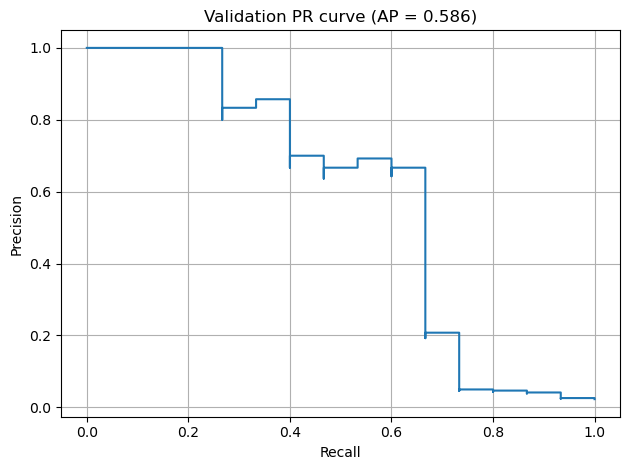

[Train+Val] thr=0.9637  AUPRC=0.6205  ROC AUC=0.9101  F1=0.6049  Sensitivity=0.5586  Specificity=0.9906
Soft-match results (window=3): Threshold 0.9637, TP=84, FP=10, FN=27, Precision=0.8936, Recall=0.7568, F1=0.8195


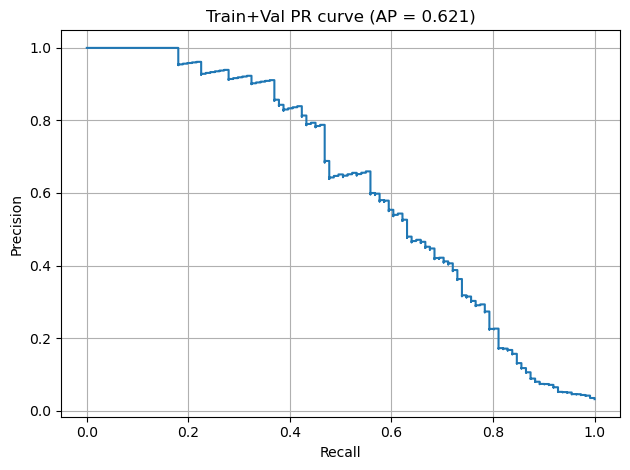

[Test] thr=0.9637  AUPRC=0.7377  ROC AUC=0.9022  F1=0.8438  Sensitivity=0.7941  Specificity=0.9963
Soft-match results (window=3): Threshold 0.9637, TP=29, FP=1, FN=5, Precision=0.9667, Recall=0.8529, F1=0.9062


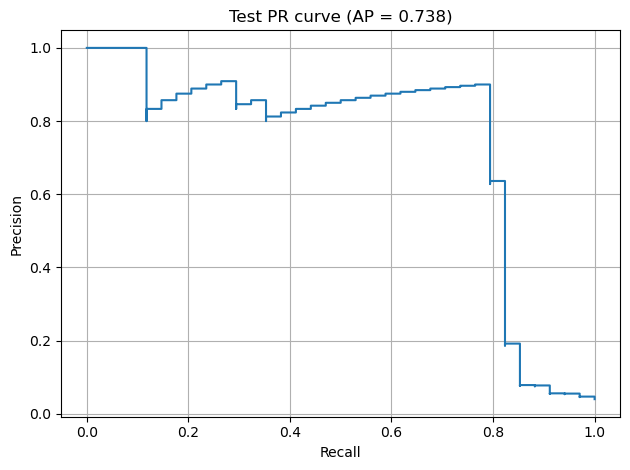

In [6]:
test_mat = cs2_pipeline.run()

## Example 2: Sentinel-3A

In [7]:
# configuration parameters
unprop_csv_path = unprop_dir + "unpropagated_elements_Sentinel-3A.csv"
man_path = man_dir + "s3aman.txt"
time_col=None
label_col="maneuver_status"
base_feats=["specific_orbital_energy"]
add_diffs=True
only_diffs=True
expand_maneuver_days=0
seq_len=64
stride=1
batch_size=128
epochs=100
lr=1e-3
weight_decay=1e-4
hidden=64
layers=2
dropout=0.2
val_frac=0.20
test_frac=0.20
seed= 42
patience= 16
device="cuda"

In [8]:
s3a_pipeline = LSTMTLEDailyPipeline(
    unprop_csv_path,
    man_path,
    time_col,
    label_col,
    base_feats,
    add_diffs,
    only_diffs,
    expand_maneuver_days,
    seq_len,
    stride,
    batch_size,
    epochs,
    lr,
    weight_decay,
    hidden,
    layers,
    dropout,
    val_frac,
    test_frac,
    seed,
    patience,
    device,
)

Using features: ['Δ specific_orbital_energy']
Epoch 01 | train_loss=1.3459 | val_AUPRC=0.5476 | pos_w=48.1 | positive labels=30/1473
Epoch 02 | train_loss=1.3057 | val_AUPRC=0.6493 | pos_w=48.1 | positive labels=30/1473
Epoch 03 | train_loss=1.2436 | val_AUPRC=0.7025 | pos_w=48.1 | positive labels=30/1473
Epoch 04 | train_loss=1.1367 | val_AUPRC=0.7184 | pos_w=48.1 | positive labels=30/1473
Epoch 05 | train_loss=0.9383 | val_AUPRC=0.8364 | pos_w=48.1 | positive labels=30/1473
Epoch 06 | train_loss=0.8477 | val_AUPRC=0.8364 | pos_w=48.1 | positive labels=30/1473
Epoch 07 | train_loss=0.7523 | val_AUPRC=0.8364 | pos_w=48.1 | positive labels=30/1473
Epoch 08 | train_loss=0.6738 | val_AUPRC=0.8364 | pos_w=48.1 | positive labels=30/1473
Epoch 09 | train_loss=0.6312 | val_AUPRC=0.8364 | pos_w=48.1 | positive labels=30/1473
Epoch 10 | train_loss=0.6841 | val_AUPRC=0.8364 | pos_w=48.1 | positive labels=30/1473
Epoch 11 | train_loss=0.6068 | val_AUPRC=0.8364 | pos_w=48.1 | positive labels=30/14

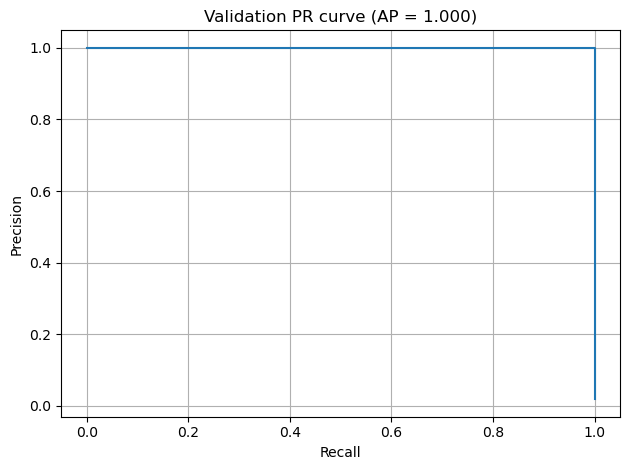

[Train+Val] thr=0.2273  AUPRC=0.9256  ROC AUC=0.9868  F1=0.8831  Sensitivity=0.9444  Specificity=0.9960
Soft-match results (window=3): Threshold 0.2273, TP=35, FP=6, FN=1, Precision=0.8537, Recall=0.9722, F1=0.9091


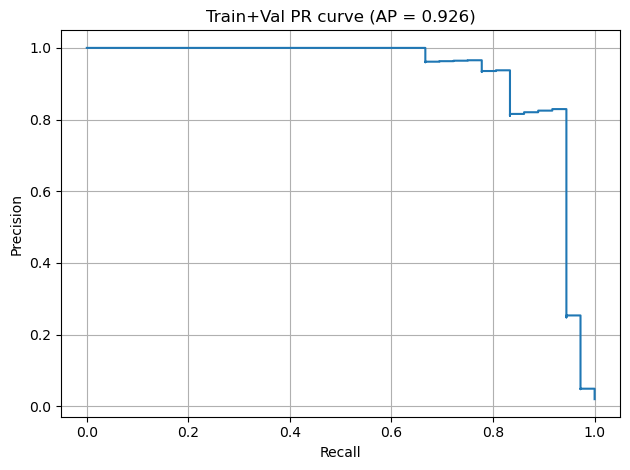

[Test] thr=0.2273  AUPRC=0.8617  ROC AUC=0.9331  F1=0.8235  Sensitivity=0.8235  Specificity=0.9925
Soft-match results (window=3): Threshold 0.2273, TP=16, FP=1, FN=1, Precision=0.9412, Recall=0.9412, F1=0.9412


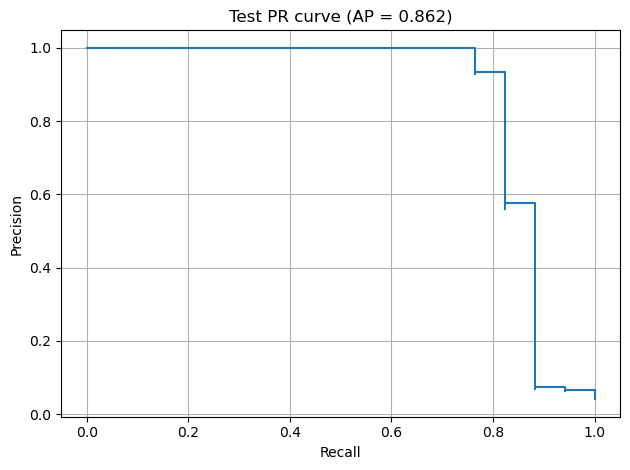

{'thr': np.float32(0.22732182),
 'AUPRC': np.float64(0.8617228218415484),
 'ROCAUC': np.float64(0.9331084054569458),
 'F1': 0.8235294117647058,
 'Sensitivity': np.float64(0.8235294117647058),
 'Specificity': np.float64(0.9925187032418953)}

In [9]:
s3a_pipeline.run()

## Example 3: Sentinel-3B

In [10]:
# configuration parameters
unprop_csv_path = unprop_dir + "unpropagated_elements_Sentinel-3B.csv"
man_path = man_dir + "s3bman.txt"
time_col=None
label_col="maneuver_status"
base_feats=["specific_orbital_energy"]
add_diffs=True
only_diffs=True
expand_maneuver_days=0
seq_len=64
stride=1
batch_size=128
epochs=100
lr=1e-3
weight_decay=1e-4
hidden=64
layers=2
dropout=0.2
val_frac=0.20
test_frac=0.20
seed= 42
patience= 16
device="cuda"

In [11]:
s3b_pipeline = LSTMTLEDailyPipeline(
    unprop_csv_path,
    man_path,
    time_col,
    label_col,
    base_feats,
    add_diffs,
    only_diffs,
    expand_maneuver_days,
    seq_len,
    stride,
    batch_size,
    epochs,
    lr,
    weight_decay,
    hidden,
    layers,
    dropout,
    val_frac,
    test_frac,
    seed,
    patience,
    device,
)

Using features: ['Δ specific_orbital_energy']
Epoch 01 | train_loss=1.3493 | val_AUPRC=0.1461 | pos_w=32.2 | positive labels=29/963
Epoch 02 | train_loss=1.3428 | val_AUPRC=0.1038 | pos_w=32.2 | positive labels=29/963
Epoch 03 | train_loss=1.3424 | val_AUPRC=0.1033 | pos_w=32.2 | positive labels=29/963
Epoch 04 | train_loss=1.3379 | val_AUPRC=0.0826 | pos_w=32.2 | positive labels=29/963
Epoch 05 | train_loss=1.3363 | val_AUPRC=0.0690 | pos_w=32.2 | positive labels=29/963
Epoch 06 | train_loss=1.3266 | val_AUPRC=0.0692 | pos_w=32.2 | positive labels=29/963
Epoch 07 | train_loss=1.3225 | val_AUPRC=0.0602 | pos_w=32.2 | positive labels=29/963
Epoch 08 | train_loss=1.3180 | val_AUPRC=0.0533 | pos_w=32.2 | positive labels=29/963
Epoch 09 | train_loss=1.2966 | val_AUPRC=0.0488 | pos_w=32.2 | positive labels=29/963
Epoch 10 | train_loss=1.2871 | val_AUPRC=0.0541 | pos_w=32.2 | positive labels=29/963
Epoch 11 | train_loss=1.2843 | val_AUPRC=0.0609 | pos_w=32.2 | positive labels=29/963
Epoch 12

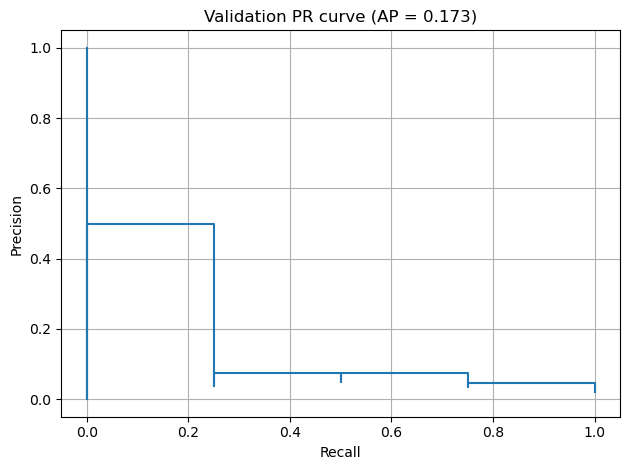

[Train+Val] thr=0.7107  AUPRC=0.1936  ROC AUC=0.7512  F1=0.2642  Sensitivity=0.2121  Specificity=0.9884
Soft-match results (window=3): Threshold 0.7107, TP=7, FP=13, FN=26, Precision=0.3500, Recall=0.2121, F1=0.2642


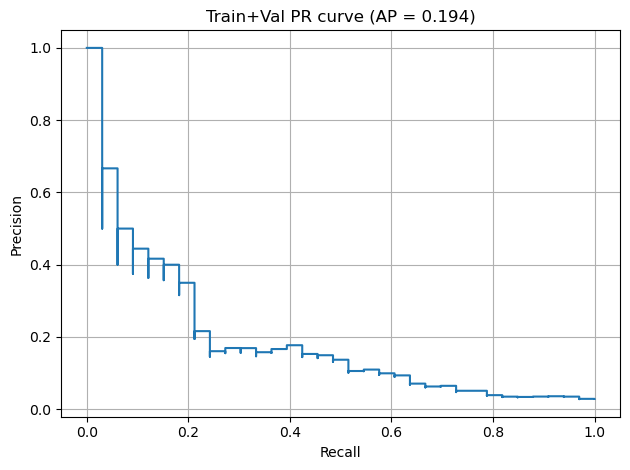

[Test] thr=0.7107  AUPRC=0.1707  ROC AUC=0.8090  F1=0.0000  Sensitivity=0.0000  Specificity=1.0000
Soft-match results (window=3): Threshold 0.7107, TP=0, FP=0, FN=8, Precision=0.0000, Recall=0.0000, F1=0.0000


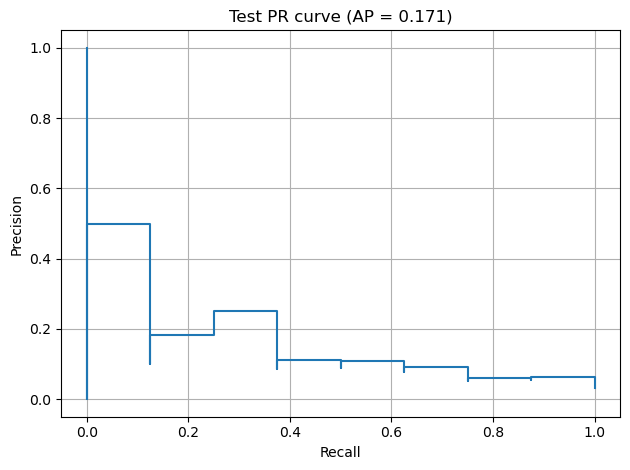

{'thr': np.float32(0.71072936),
 'AUPRC': np.float64(0.17072215013949088),
 'ROCAUC': np.float64(0.8089999999999999),
 'F1': 0.0,
 'Sensitivity': np.float64(0.0),
 'Specificity': np.float64(1.0)}

In [12]:
s3b_pipeline.run()

## Example 4: Jason-1

In [13]:
# configuration parameters
unprop_csv_path = unprop_dir + "propagated_elements_Jason-1.csv"
man_path = man_dir + "ja1man.txt"
time_col=None
label_col="maneuver_status"
base_feats=["mean anomaly", "eccentricity", "argument of perigee", "inclination"]
add_diffs=True
only_diffs=True
expand_maneuver_days=0
seq_len=64
stride=1
batch_size=128
epochs=100
lr=1e-3
weight_decay=1e-4
hidden=64
layers=2
dropout=0.1
val_frac=0.20
test_frac=0.20
seed= 42
patience= 16
device="cuda"

In [14]:
ja1_pipeline = LSTMTLEDailyPipeline(
    unprop_csv_path,
    man_path,
    time_col,
    label_col,
    base_feats,
    add_diffs,
    only_diffs,
    expand_maneuver_days,
    seq_len,
    stride,
    batch_size,
    epochs,
    lr,
    weight_decay,
    hidden,
    layers,
    dropout,
    val_frac,
    test_frac,
    seed,
    patience,
    device,
)

Using features: ['Δ mean anomaly', 'Δ eccentricity', 'Δ argument of perigee', 'Δ inclination']
Epoch 01 | train_loss=1.3583 | val_AUPRC=0.0275 | pos_w=48.3 | positive labels=53/2614
Epoch 02 | train_loss=1.3578 | val_AUPRC=0.0253 | pos_w=48.3 | positive labels=53/2614
Epoch 03 | train_loss=1.3486 | val_AUPRC=0.0244 | pos_w=48.3 | positive labels=53/2614
Epoch 04 | train_loss=1.3419 | val_AUPRC=0.0245 | pos_w=48.3 | positive labels=53/2614
Epoch 05 | train_loss=1.3324 | val_AUPRC=0.0250 | pos_w=48.3 | positive labels=53/2614
Epoch 06 | train_loss=1.3215 | val_AUPRC=0.0253 | pos_w=48.3 | positive labels=53/2614
Epoch 07 | train_loss=1.2954 | val_AUPRC=0.0284 | pos_w=48.3 | positive labels=53/2614
Epoch 08 | train_loss=1.2829 | val_AUPRC=0.0271 | pos_w=48.3 | positive labels=53/2614
Epoch 09 | train_loss=1.2640 | val_AUPRC=0.0252 | pos_w=48.3 | positive labels=53/2614
Epoch 10 | train_loss=1.2551 | val_AUPRC=0.0259 | pos_w=48.3 | positive labels=53/2614
Epoch 11 | train_loss=1.2372 | val_

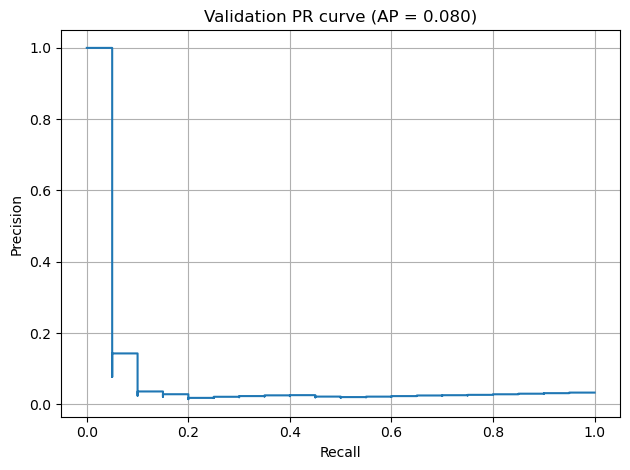

[Train+Val] thr=0.6746  AUPRC=0.0973  ROC AUC=0.6451  F1=0.1579  Sensitivity=0.3288  Specificity=0.9342
Soft-match results (window=3): Threshold 0.6746, TP=29, FP=202, FN=44, Precision=0.1255, Recall=0.3973, F1=0.1908


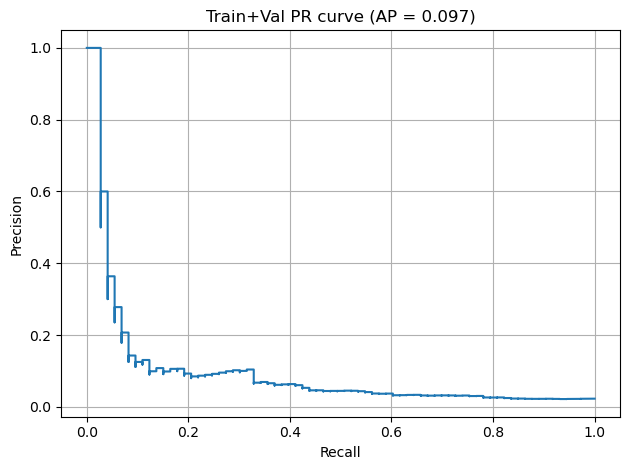

[Test] thr=0.6746  AUPRC=0.0393  ROC AUC=0.3914  F1=0.0662  Sensitivity=0.1429  Specificity=0.8498
Soft-match results (window=3): Threshold 0.6746, TP=10, FP=106, FN=25, Precision=0.0862, Recall=0.2857, F1=0.1325


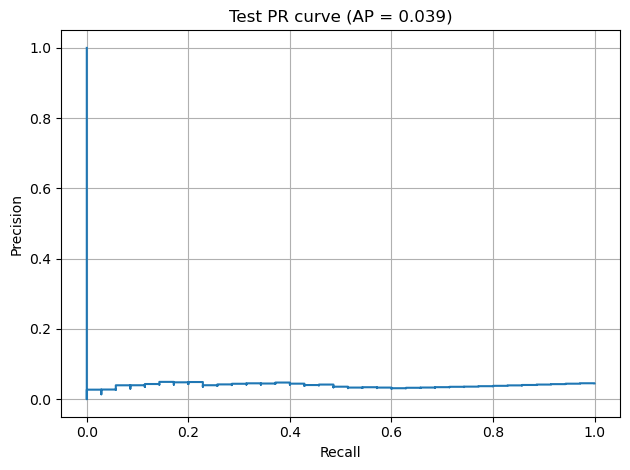

{'thr': np.float32(0.67461276),
 'AUPRC': np.float64(0.039315596623715775),
 'ROCAUC': np.float64(0.39141697274308906),
 'F1': 0.06622516556291391,
 'Sensitivity': np.float64(0.14285714285714285),
 'Specificity': np.float64(0.8497970230040596)}

In [15]:
ja1_pipeline.run()

## ARIMA method

In [16]:
import matplotlib.pyplot as plt
from preprocessing_data import Preprocessor
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from arima_outlier_detector import ARIMAOutlierDetector, SlidingWindowARIMAOutlierDetector, ARIMAOutlierDetectorEnhanced, SlidingWindowARIMAOutlierDetectorEnhanced
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
from scipy.signal import find_peaks

In [17]:
def soft_match_scores(y_true, y_pred, window=3):
    """
    Compute soft-matching TP, FP, FN, precision, recall, F1 for two binary sequences.
    
    - y_true, y_pred: lists or arrays of 0/1 values of equal length.
    - window: integer tolerance for matching (default ±3 indices).
    """
    if len(y_pred) != len(y_true):
        raise ValueError("y_true and y_pred must have the same length.")
    # Find all indices of positive events in true and predicted arrays
    pred_indices = [i for i, v in enumerate(y_pred) if v == 1]
    true_indices = [j for j, v in enumerate(y_true) if v == 1]

    matched_pred = set()
    matched_true = set()
    candidate_pairs = []
    # Build list of (distance, pred_idx, true_idx) for all pairs within the window
    for i in pred_indices:
        for j in true_indices:
            dist = abs(i - j)
            if dist <= window:
                candidate_pairs.append((dist, i, j))
    # Sort by temporal distance (closest matches first)
    candidate_pairs.sort(key=lambda x: x[0])

    # Greedily match pairs (smallest distance first), without reuse of indices
    tp = 0
    for dist, i, j in candidate_pairs:
        if i not in matched_pred and j not in matched_true:
            matched_pred.add(i)
            matched_true.add(j)
            tp += 1

    total_preds = len(pred_indices)
    total_true = len(true_indices)
    fp = total_preds - tp
    fn = total_true - tp
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall    = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0.0
    return tp, fp, fn, precision, recall, f1


In [18]:
def find_best_threshold_soft_match(scores, labels, thresholds=np.linspace(1.0, 100, 101), window=3):
    """
    Find best threshold using soft-matching F1 (±window days).
    
    Args:
        scores (np.ndarray): anomaly scores
        labels (np.ndarray): ground-truth binary labels
        thresholds (array): candidate thresholds to test
        window (int): matching tolerance in days (default ±3)
    
    Returns:
        best_thr (float): threshold with highest soft F1
        best_metrics (dict): dict with soft F1, precision, recall
    """
    best_f1 = -1
    best_thr = None
    best_metrics = {}

    for thr in thresholds:
        preds = (scores >= thr).astype(int)
        tp, fp, fn, precision, recall, f1 = soft_match_scores(labels, preds, window=window)

        if f1 > best_f1:
            best_f1 = f1
            best_thr = thr
            best_metrics = {
                "F1_soft": f1,
                "Precision_soft": precision,
                "Recall_soft": recall,
                "TP": tp,
                "FP": fp,
                "FN": fn,
                "Threshold": thr
            }

    return best_thr, best_metrics


## 1. CS2

In [19]:
unprop_csv_path = unprop_dir + "unpropagated_elements_CryoSat-2.csv"
man_path = man_dir + "cs2man.txt"

In [20]:

cs2_preprocessor = Preprocessor(
    unprop_csv_path,
    man_path
)

In [21]:
cs2_preprocessor.processed_data()
cs2_data = cs2_preprocessor.get_unprop_data()

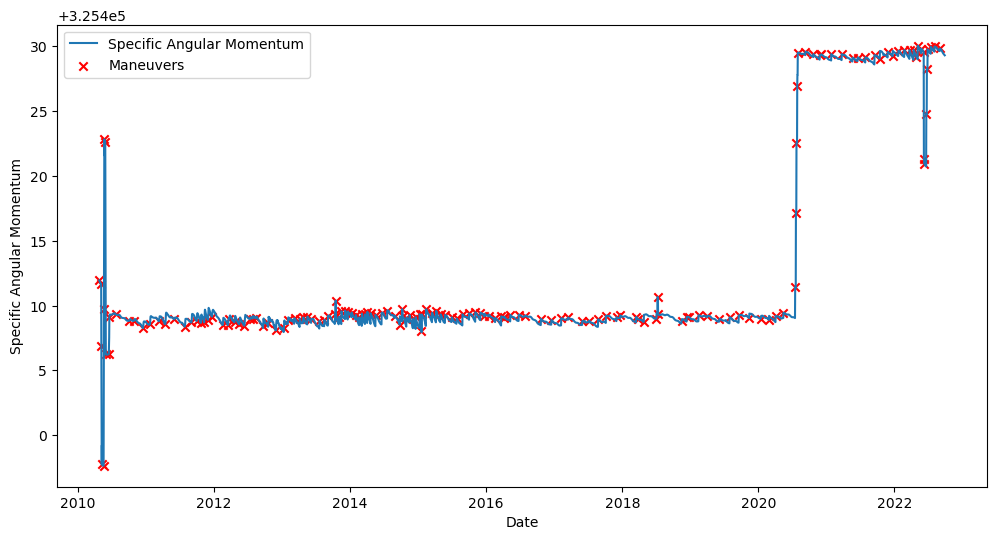

In [22]:
# plot specific angular momentum with maneuver status

plt.figure(figsize=(12, 6))
plt.plot(cs2_data.index, cs2_data["specific_angular_momentum"], label="Specific Angular Momentum")
plt.scatter(cs2_data.index[cs2_data["maneuver_status"] == 1], cs2_data["specific_angular_momentum"][cs2_data["maneuver_status"] == 1], color='red', label="Maneuvers", marker='x')
plt.xlabel("Date")
plt.ylabel("Specific Angular Momentum")
plt.legend()
plt.show()

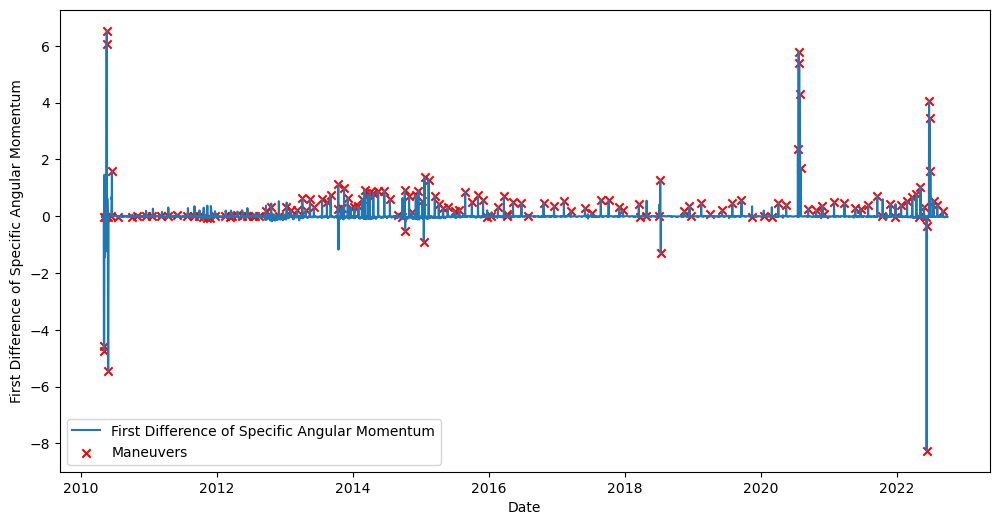

In [23]:
# first difference of specific angular momentum
cs2_data["specific_angular_momentum_diff"] = cs2_data["specific_angular_momentum"].diff()
# plot first difference of specific angular momentum with maneuver status
plt.figure(figsize=(12, 6))
plt.plot(cs2_data.index, cs2_data["specific_angular_momentum_diff"], label="First Difference of Specific Angular Momentum")
plt.scatter(cs2_data.index[cs2_data["maneuver_status"] == 1], cs2_data["specific_angular_momentum_diff"][cs2_data["maneuver_status"] == 1], color='red', label="Maneuvers", marker='x')
plt.xlabel("Date")
plt.ylabel("First Difference of Specific Angular Momentum")
plt.legend()
plt.show()

In [24]:
# test stationary of specific angular momentum time series
result = adfuller(cs2_data["specific_angular_momentum_diff"].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -12.434737929178516
p-value: 3.869688123385037e-23


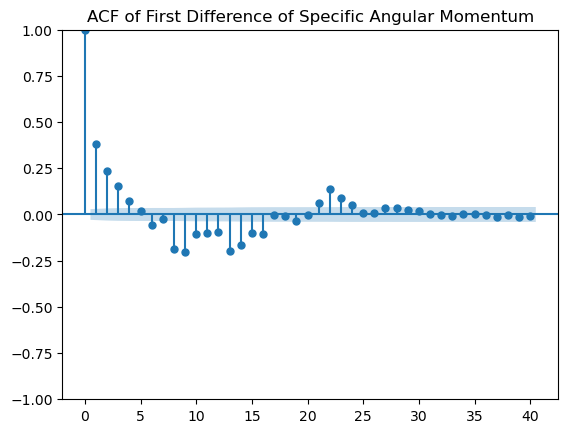

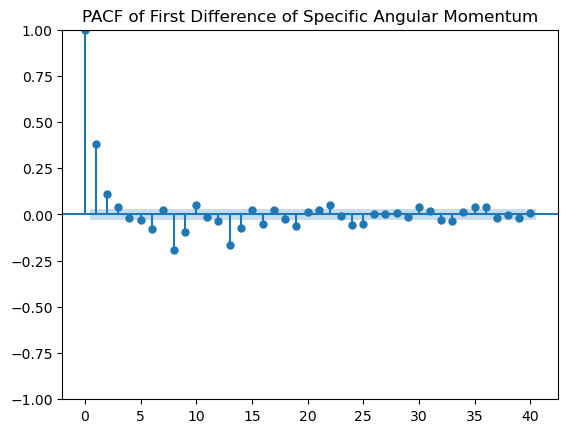

In [25]:
# plot acf and pacf of first difference of specific angular momentum

plot_acf(cs2_data["specific_angular_momentum_diff"].dropna(), lags=40)
plt.title("ACF of First Difference of Specific Angular Momentum")
plot_pacf(cs2_data["specific_angular_momentum_diff"].dropna(), lags=40)
plt.title("PACF of First Difference of Specific Angular Momentum")
plt.show()

In [26]:
# fit ARIMA model and obtain AIC and BIC
arima_model = pm.auto_arima(cs2_data["specific_angular_momentum_diff"].dropna(), start_p=0, start_q=0, seasonal=False)
print("ARIMA Model Summary:")
print(arima_model.summary())

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4539
Model:               SARIMAX(5, 0, 1)   Log Likelihood               -1220.457
Date:                Mon, 17 Nov 2025   AIC                           2454.915
Time:                        10:06:37   BIC                           2499.858
Sample:                    04-26-2010   HQIC                          2470.744
                         - 09-28-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2207      0.005    227.463      0.000       1.210       1.231
ar.L2         -0.1972      0.006    -35.844      0.000      -0.208      -0.186
ar.L3         -0.0295      0.00

In [27]:
cs2_detector = ARIMAOutlierDetector(5, 1, 1, threshold=20, robust_sigma=True)

In [28]:
cs2_detector.fit(cs2_data["specific_angular_momentum"])

In [29]:
print("Detected Outliers length:", len(np.where(cs2_detector.is_outlier_)[0]))

Detected Outliers length: 360


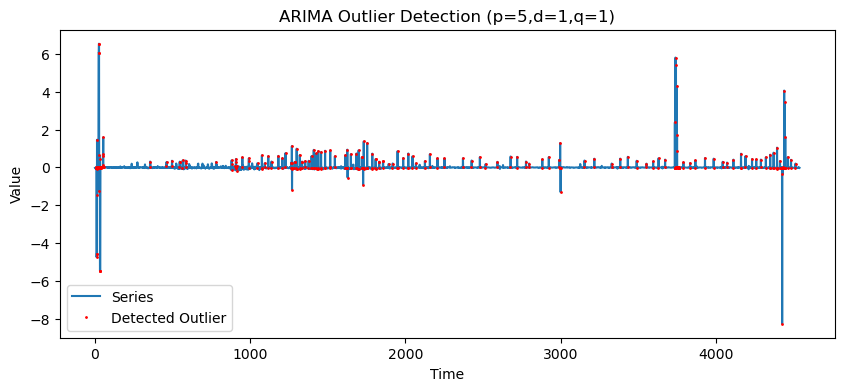

In [30]:
cs2_detector.plot_series_with_outliers(cs2_data["specific_angular_momentum_diff"])

In [31]:
peaks, _ = find_peaks(cs2_detector.anomaly_scores_, height=cs2_detector.threshold)
# print peaks length
print("Number of Detected Peaks:", len(peaks))

Number of Detected Peaks: 144


In [32]:
# verify the manuevers via detected outliers and peaks
manuever_indices = np.where(cs2_data["maneuver_status"] == 1)[0]
detected_outlier_indices = np.where(cs2_detector.is_outlier_)[0]

In [33]:
scores = cs2_detector.anomaly_scores_
labels = cs2_data["maneuver_status"].values  # shape should match

best_thr, metrics = find_best_threshold_soft_match(scores, labels, window=0)
print("Best soft-match threshold:", best_thr)
print("Soft F1 / Precision / Recall:", metrics)



Best soft-match threshold: 30.7
Soft F1 / Precision / Recall: {'F1_soft': 0.49758454106280203, 'Precision_soft': 0.40234375, 'Recall_soft': 0.6518987341772152, 'TP': 103, 'FP': 153, 'FN': 55, 'Threshold': np.float64(30.7)}


In [34]:
# auto arima fit
arima_model = pm.auto_arima(cs2_data["Brouwer mean motion"].dropna(), start_p=0, start_q=0, seasonal=False, stepwise=True)
print("ARIMA Model Summary:")
print(arima_model.summary())

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4540
Model:               SARIMAX(0, 1, 0)   Log Likelihood               51686.199
Date:                Mon, 17 Nov 2025   AIC                        -103370.398
Time:                        10:06:42   BIC                        -103363.977
Sample:                    04-25-2010   HQIC                       -103368.137
                         - 09-28-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.032e-11   2.84e-11      0.715      0.474   -3.54e-11     7.6e-11
Ljung-Box (L1) (Q):                 649.99   Jarque-Bera (JB):          12710287.35
Prob(Q):                  

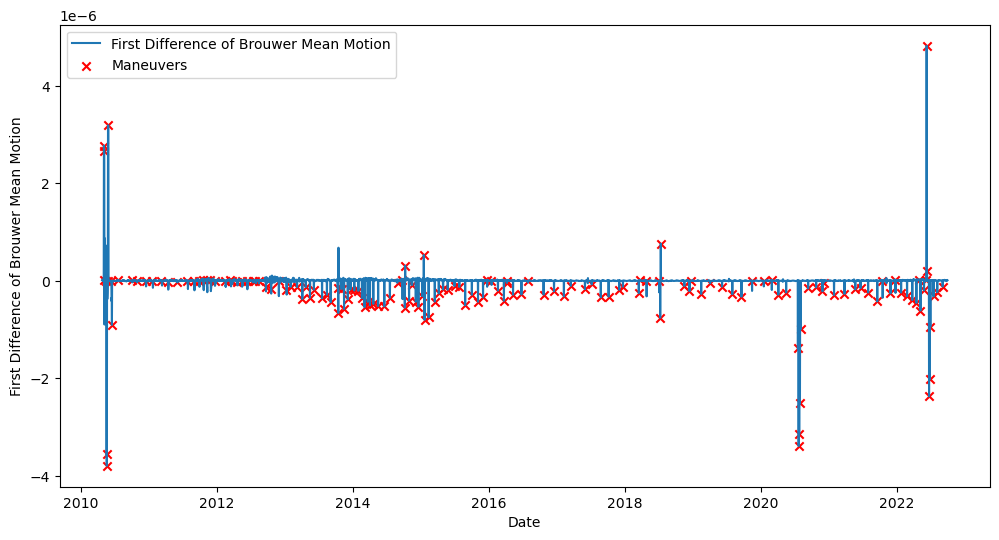

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(cs2_data.index, cs2_data["Brouwer mean motion"].diff(), label="First Difference of Brouwer Mean Motion")
plt.scatter(cs2_data.index[cs2_data["maneuver_status"] == 1], cs2_data["Brouwer mean motion"].diff()[cs2_data["maneuver_status"] == 1], color='red', label="Maneuvers", marker='x')
plt.xlabel("Date")
plt.ylabel("First Difference of Brouwer Mean Motion")
plt.legend()
plt.show()

In [36]:
# test stationary of specific angular momentum time series
result = adfuller(cs2_data["Brouwer mean motion"].diff().dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -12.431066226433176
p-value: 3.9394333358622995e-23


Text(0.5, 1.0, 'PACF of First Difference of Brouwer Mean Motion')

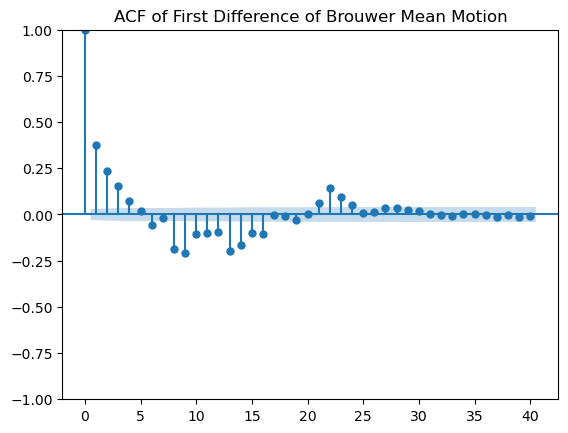

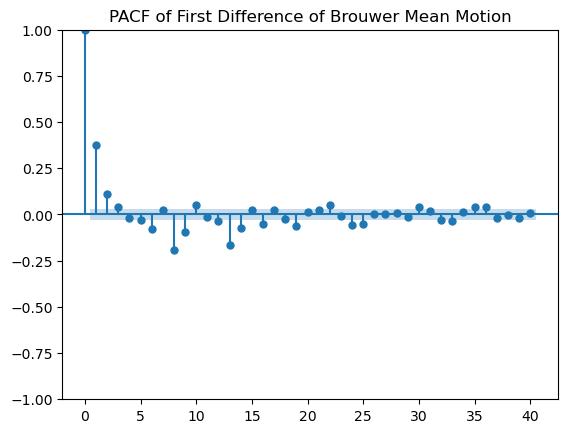

In [37]:
# acf and pacf of first difference of Brouwer mean motion
plot_acf(cs2_data["Brouwer mean motion"].diff().dropna(), lags=40)
plt.title("ACF of First Difference of Brouwer Mean Motion")
plot_pacf(cs2_data["Brouwer mean motion"].diff().dropna(), lags=40)
plt.title("PACF of First Difference of Brouwer Mean Motion")

In [38]:
detector = SlidingWindowARIMAOutlierDetectorEnhanced(
    window_size=180,
    step_size=30,
    p= 2, d=1, q=0
)



In [39]:
detector.fit(cs2_data["Brouwer mean motion"])

C:\Users\trone\AppData\Roaming\Python\Python313\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\trone\AppData\Roaming\Python\Python313\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\trone\AppData\Roaming\Python\Python313\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\trone\AppData\Roaming\Python\Python313\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\trone\AppData\R

In [40]:
scores = detector.anomaly_scores_
outliers = detector.is_outlier_

In [41]:
scores = detector.anomaly_scores_
labels = cs2_data["maneuver_status"].values  # shape should match

best_thr, metrics = find_best_threshold_soft_match(scores, labels, window=3)
print("Best soft-match threshold:", best_thr)
print("Soft F1 / Precision / Recall:", metrics)

Best soft-match threshold: 6.9399999999999995
Soft F1 / Precision / Recall: {'F1_soft': 0.2096069868995633, 'Precision_soft': 0.11842105263157894, 'Recall_soft': 0.9113924050632911, 'TP': 144, 'FP': 1072, 'FN': 14, 'Threshold': np.float64(6.9399999999999995)}


## Example 2: Sentinel-3A

In [42]:
unprop_csv_path = unprop_dir + "unpropagated_elements_Sentinel-3A.csv"
man_path = man_dir + "s3aman.txt"

In [43]:

s3a_preprocessor = Preprocessor(
    unprop_csv_path,
    man_path
)

In [44]:
s3a_preprocessor.processed_data()
s3a_data = s3a_preprocessor.get_unprop_data()

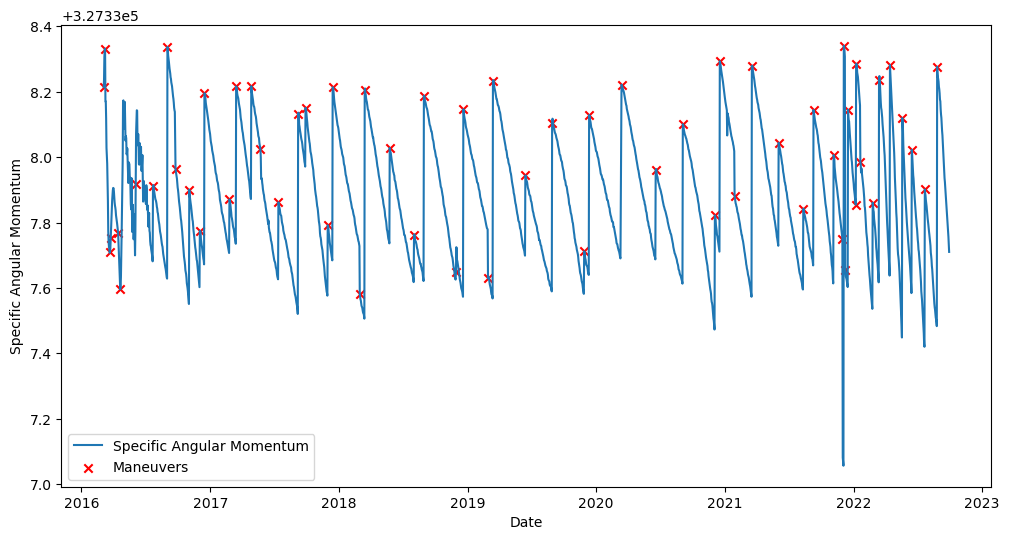

In [45]:
# plot specific angular momentum with maneuver status

plt.figure(figsize=(12, 6))
plt.plot(s3a_data.index, s3a_data["specific_angular_momentum"], label="Specific Angular Momentum")
plt.scatter(s3a_data.index[s3a_data["maneuver_status"] == 1], s3a_data["specific_angular_momentum"][s3a_data["maneuver_status"] == 1], color='red', label="Maneuvers", marker='x')
plt.xlabel("Date")
plt.ylabel("Specific Angular Momentum")
plt.legend()
plt.show()

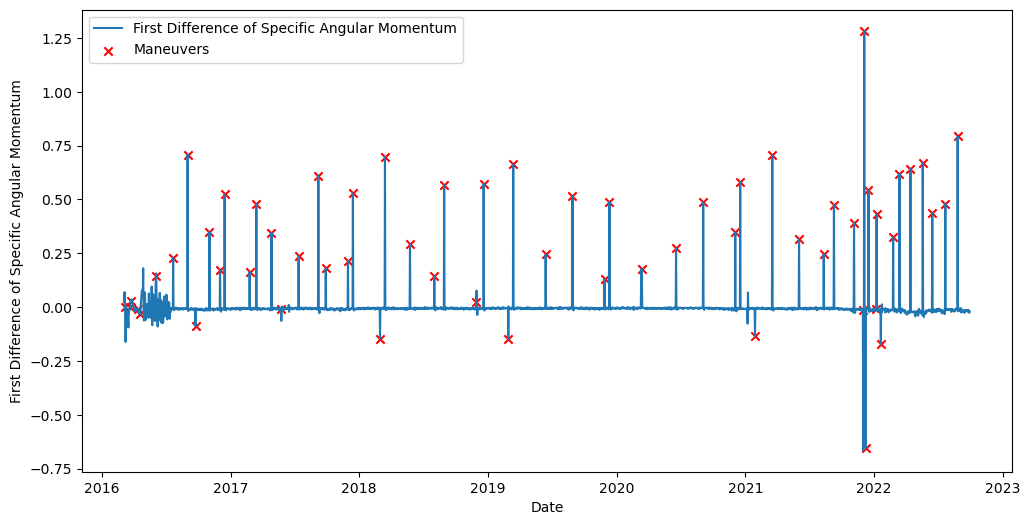

In [46]:
# first difference of specific angular momentum
s3a_data["specific_angular_momentum_diff"] = s3a_data["specific_angular_momentum"].diff()
# plot first difference of specific angular momentum with maneuver status
plt.figure(figsize=(12, 6))
plt.plot(s3a_data.index, s3a_data["specific_angular_momentum_diff"], label="First Difference of Specific Angular Momentum")
plt.scatter(s3a_data.index[s3a_data["maneuver_status"] == 1], s3a_data["specific_angular_momentum_diff"][s3a_data["maneuver_status"] == 1], color='red', label="Maneuvers", marker='x')
plt.xlabel("Date")
plt.ylabel("First Difference of Specific Angular Momentum")
plt.legend()
plt.show()

In [47]:
# test stationary of specific angular momentum time series
result = adfuller(s3a_data["specific_angular_momentum_diff"].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -19.752908128665194
p-value: 0.0


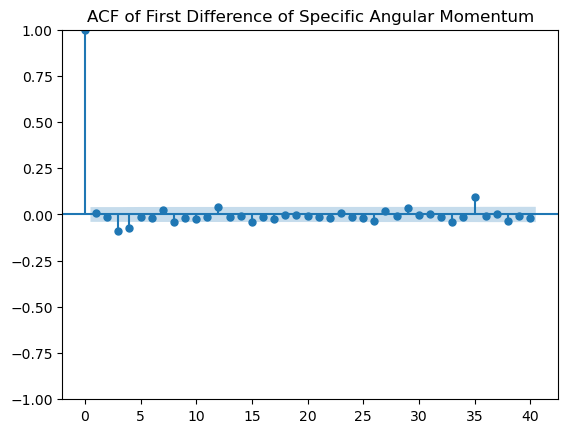

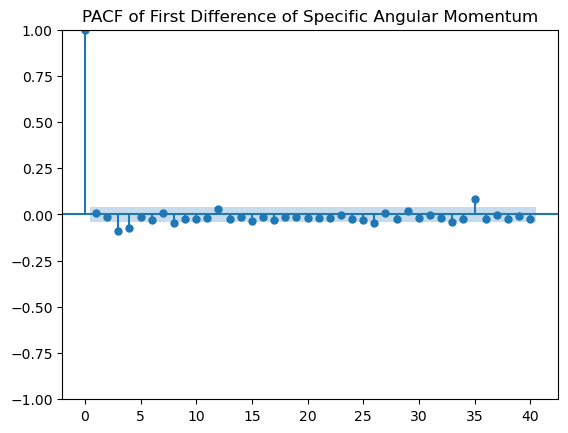

In [48]:
# plot acf and pacf of first difference of specific angular momentum

plot_acf(s3a_data["specific_angular_momentum_diff"].dropna(), lags=40)
plt.title("ACF of First Difference of Specific Angular Momentum")
plot_pacf(s3a_data["specific_angular_momentum_diff"].dropna(), lags=40)
plt.title("PACF of First Difference of Specific Angular Momentum")
plt.show()

In [49]:
# fit ARIMA model and obtain AIC and BIC
arima_model = pm.auto_arima(s3a_data["specific_angular_momentum_diff"].dropna(), start_p=0, start_q=0, seasonal=False)
print("ARIMA Model Summary:")
print(arima_model.summary())

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2400
Model:                        SARIMAX   Log Likelihood                2915.777
Date:                Mon, 17 Nov 2025   AIC                          -5829.555
Time:                        10:06:48   BIC                          -5823.771
Sample:                    03-05-2016   HQIC                         -5827.451
                         - 09-29-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0052   2.15e-05    240.115      0.000       0.005       0.005
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):            909699.58
Prob(Q):                  

In [50]:
s3a_detector = ARIMAOutlierDetector(0, 1, 0, threshold=20, robust_sigma=True)

In [51]:
s3a_detector.fit(s3a_data["specific_angular_momentum"])

C:\Users\trone\AppData\Roaming\Python\Python313\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [52]:
print("Detected Outliers length:", len(np.where(s3a_detector.is_outlier_)[0]))

Detected Outliers length: 78


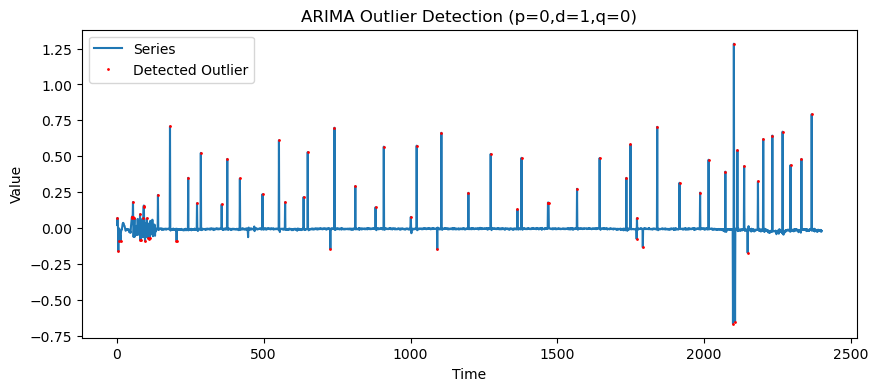

In [53]:
s3a_detector.plot_series_with_outliers(s3a_data["specific_angular_momentum_diff"])

In [54]:
peaks, _ = find_peaks(s3a_detector.anomaly_scores_, height=s3a_detector.threshold)
# print peaks length
print("Number of Detected Peaks:", len(peaks))

Number of Detected Peaks: 66


In [55]:
# verify the manuevers via detected outliers and peaks
manuever_indices = np.where(s3a_data["maneuver_status"] == 1)[0]
detected_outlier_indices = np.where(s3a_detector.is_outlier_)[0]

In [56]:
scores = s3a_detector.anomaly_scores_
labels = s3a_data["maneuver_status"].values  # shape should match

best_thr, metrics = find_best_threshold_soft_match(scores, labels, window=0)
print("Best soft-match threshold:", best_thr)
print("Soft F1 / Precision / Recall:", metrics)



Best soft-match threshold: 29.71
Soft F1 / Precision / Recall: {'F1_soft': 0.8620689655172413, 'Precision_soft': 0.8928571428571429, 'Recall_soft': 0.8333333333333334, 'TP': 50, 'FP': 6, 'FN': 10, 'Threshold': np.float64(29.71)}


## Example 2: Sentinel-3B

In [77]:
unprop_csv_path = unprop_dir + "unpropagated_elements_Sentinel-3B.csv"
man_path = man_dir + "s3bman.txt"

In [78]:

s3b_preprocessor = Preprocessor(
    unprop_csv_path,
    man_path
)

In [79]:
s3b_preprocessor.processed_data()
s3b_data = s3b_preprocessor.get_unprop_data()

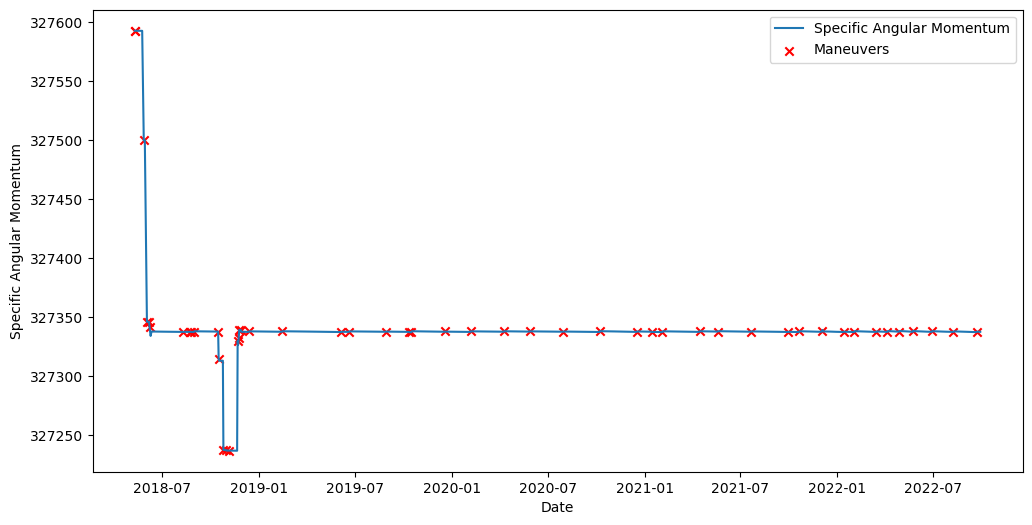

In [80]:
# plot specific angular momentum with maneuver status

plt.figure(figsize=(12, 6))
plt.plot(s3b_data.index, s3b_data["specific_angular_momentum"], label="Specific Angular Momentum")
plt.scatter(s3b_data.index[s3b_data["maneuver_status"] == 1], s3b_data["specific_angular_momentum"][s3b_data["maneuver_status"] == 1], color='red', label="Maneuvers", marker='x')
plt.xlabel("Date")
plt.ylabel("Specific Angular Momentum")
plt.legend()
plt.show()

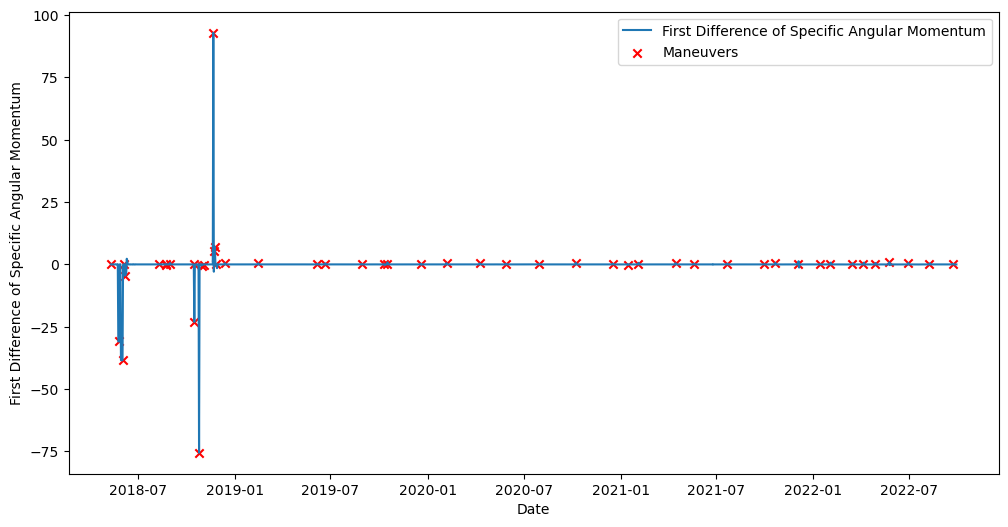

In [81]:
# first difference of specific angular momentum
s3b_data["specific_angular_momentum_diff"] = s3b_data["specific_angular_momentum"].diff()
# plot first difference of specific angular momentum with maneuver status
plt.figure(figsize=(12, 6))
plt.plot(s3b_data.index, s3b_data["specific_angular_momentum_diff"], label="First Difference of Specific Angular Momentum")
plt.scatter(s3b_data.index[s3b_data["maneuver_status"] == 1], s3b_data["specific_angular_momentum_diff"][s3b_data["maneuver_status"] == 1], color='red', label="Maneuvers", marker='x')
plt.xlabel("Date")
plt.ylabel("First Difference of Specific Angular Momentum")
plt.legend()
plt.show()

In [82]:
# test stationary of specific angular momentum time series
result = adfuller(s3b_data["specific_angular_momentum_diff"].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -9.754525766884413
p-value: 7.853884940634793e-17


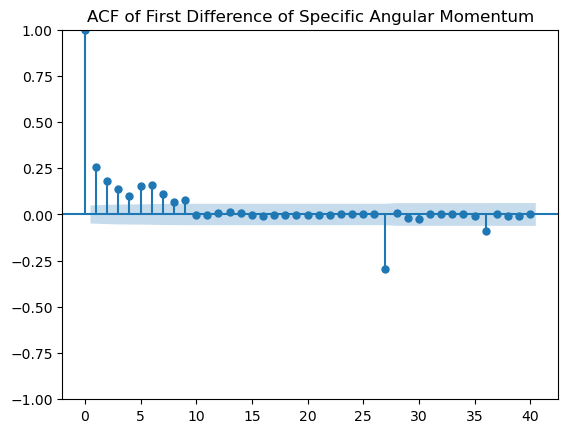

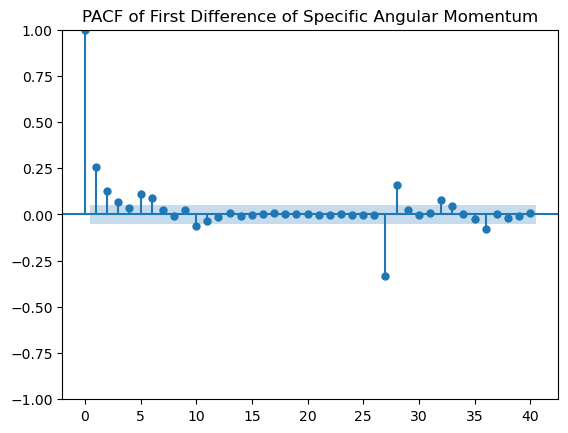

In [83]:
# plot acf and pacf of first difference of specific angular momentum

plot_acf(s3b_data["specific_angular_momentum_diff"].dropna(), lags=40)
plt.title("ACF of First Difference of Specific Angular Momentum")
plot_pacf(s3b_data["specific_angular_momentum_diff"].dropna(), lags=40)
plt.title("PACF of First Difference of Specific Angular Momentum")
plt.show()

In [84]:
# fit ARIMA model and obtain AIC and BIC
arima_model = pm.auto_arima(s3b_data["specific_angular_momentum_diff"].dropna(), start_p=0, start_q=0, seasonal=False)
print("ARIMA Model Summary:")
print(arima_model.summary())

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1603
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -4355.419
Date:                Mon, 17 Nov 2025   AIC                           8718.837
Time:                        10:12:53   BIC                           8740.356
Sample:                    05-11-2018   HQIC                          8726.827
                         - 09-29-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9296      0.043     21.570      0.000       0.845       1.014
ar.L2         -0.0573      0.018     -3.165      0.002      -0.093      -0.022
ma.L1         -0.7265      0.04

In [85]:
s3b_detector = ARIMAOutlierDetector(2, 1, 1, threshold=20, robust_sigma=True)

In [91]:
s3b_detector.fit(s3b_data["specific_angular_momentum"])

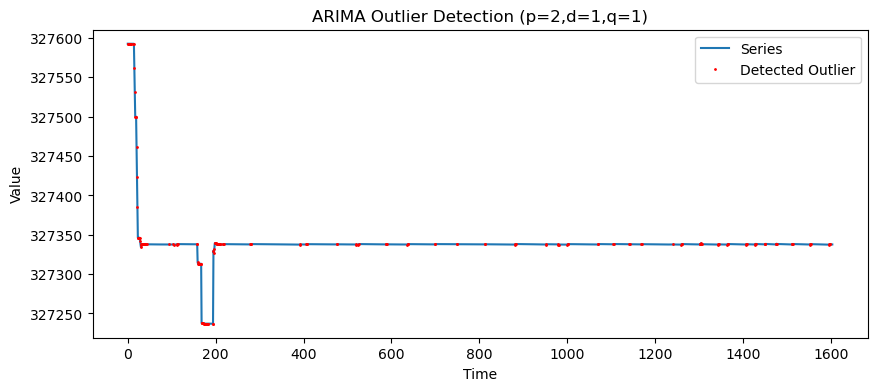

In [92]:
s3b_detector.plot_series_with_outliers(s3b_data["specific_angular_momentum"])

In [93]:
print("Detected Outliers length:", len(np.where(s3b_detector.is_outlier_)[0]))

Detected Outliers length: 177


In [94]:
# verify the manuevers via detected outliers and peaks
manuever_indices = np.where(s3b_data["maneuver_status"] == 1)[0]
detected_outlier_indices = np.where(s3b_detector.is_outlier_)[0]

In [95]:
scores = s3b_detector.anomaly_scores_
labels = s3b_data["maneuver_status"].values  # shape should match

best_thr, metrics = find_best_threshold_soft_match(scores, labels, window=0)
print("Best soft-match threshold:", best_thr)
print("Soft F1 / Precision / Recall:", metrics)



Best soft-match threshold: 50.5
Soft F1 / Precision / Recall: {'F1_soft': 0.48314606741573035, 'Precision_soft': 0.3359375, 'Recall_soft': 0.86, 'TP': 43, 'FP': 85, 'FN': 7, 'Threshold': np.float64(50.5)}
